In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm
from scipy.stats import geom, binom

In [2]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
To: /content/walmart_data.csv?1641285094
100% 23.0M/23.0M [00:00<00:00, 89.0MB/s]


In [3]:
df = pd.read_csv("walmart_data.csv?1641285094")
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


# **1. Problem Statement and Analyzing basic metrics**

This is a case study on Walmart, an american international retail corporation that has chains of super centers, departmental stores, grocery stores. It has around 100 million customers worldwide.
* Our aims to study the customer purchase behaviour based on a lot of given factors such as **gender, marital status, age groups** using various functions,mainly the confidence interval and central limit theorem. We have been given 5lakh data for each columns, it has a total of 5.5lakh rows and 10 columns which is a sample of 50 million male and 50 million female customers.

In [5]:
df.shape

(550068, 10)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [7]:
df.describe(include= "object").T

,count,unique,top,freq
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821


In [8]:
df["Occupation"].nunique()

21

In [9]:
occu_cat = df["Occupation"].value_counts()
occu_cat

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [10]:
df["User_ID"].nunique()

5891

In [11]:
df["User_ID"].value_counts().head(20)

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
1003618     767
1001150     752
1001015     740
1005795     729
1005831     727
1002909     718
1001449     714
1002063     709
1004344     705
1003391     698
1003841     698
1000424     694
1004510     691
1001980     685
1001088     680
Name: User_ID, dtype: int64

In [12]:
df["Product_ID"].nunique()

3631

In [13]:
df["Product_ID"].value_counts().head(20)

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
P00184942    1440
P00046742    1438
P00058042    1422
P00059442    1406
P00145042    1406
P00237542    1394
P00255842    1383
P00117942    1364
P00110942    1360
P00010742    1350
P00220442    1282
P00110842    1281
P00117442    1260
P00051442    1249
P00102642    1246
Name: Product_ID, dtype: int64

In [14]:
marital_status_cat = df["Marital_Status"].value_counts()
marital_status_cat

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [15]:
df["Product_Category"].nunique()

20

In [16]:
prdt_cat = df["Product_Category"].value_counts()
prdt_cat

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

In [17]:
df["Purchase"].value_counts()

7011     191
7193     188
6855     187
6891     184
7012     183
        ... 
23491      1
18345      1
3372       1
855        1
21489      1
Name: Purchase, Length: 18105, dtype: int64

In [18]:
df["City_Category"].nunique()

3

In [19]:
city_cat = df["City_Category"].value_counts()
city_cat

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [20]:
gender_cat = df["Gender"].value_counts()
gender_cat

M    414259
F    135809
Name: Gender, dtype: int64

In [21]:
df["Age"].nunique()

7

In [22]:
age_cat = df["Age"].value_counts()
age_cat

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [23]:
year_count = df["Stay_In_Current_City_Years"].value_counts()
year_count

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [24]:
pd.crosstab(index= df["Product_Category"], columns = df["Gender"], margins = True)

Gender,F,M,All
Product_Category,,,
1,24831,115547,140378
2,5658,18206,23864
3,6006,14207,20213
4,3639,8114,11753
5,41961,108972,150933
6,4559,15907,20466
7,943,2778,3721
8,33558,80367,113925
9,70,340,410


In [25]:
pd.crosstab(index=df["City_Category"], columns= df["Gender"],margins = True)

Gender,F,M,All
City_Category,,,
A,35704,112016,147720
B,57796,173377,231173
C,42309,128866,171175
All,135809,414259,550068


In [26]:
pd.crosstab(index=df["City_Category"], columns= df["Gender"],margins = True, normalize= "index")

Gender,F,M
City_Category,,
A,0.241701,0.758299
B,0.250012,0.749988
C,0.247168,0.752832
All,0.246895,0.753105


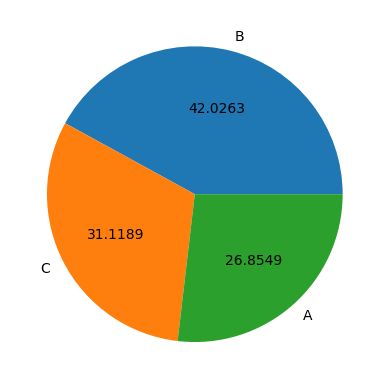

In [27]:
from seaborn.widgets import color_palette
plt.pie(city_cat, labels = city_cat.index, autopct = "%.4f")
plt.show()

<Axes: xlabel='Age', ylabel='Purchase'>

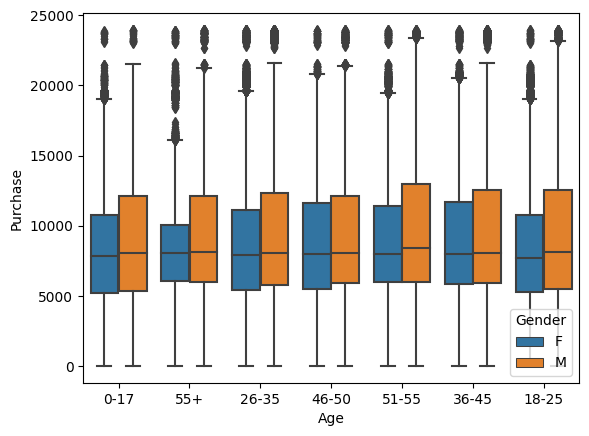

In [28]:
sns.boxplot(data = df, x=df["Age"], y=df["Purchase"], hue=df["Gender"])

<Axes: xlabel='Age', ylabel='Count'>

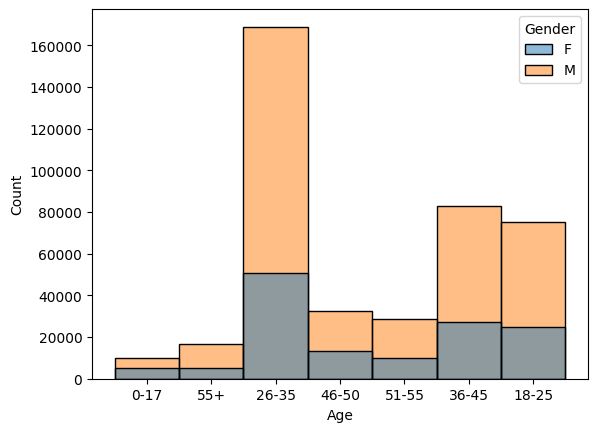

In [29]:
sns.histplot(data=df, x= df["Age"], hue = df["Gender"])

<Axes: xlabel='Product_Category', ylabel='count'>

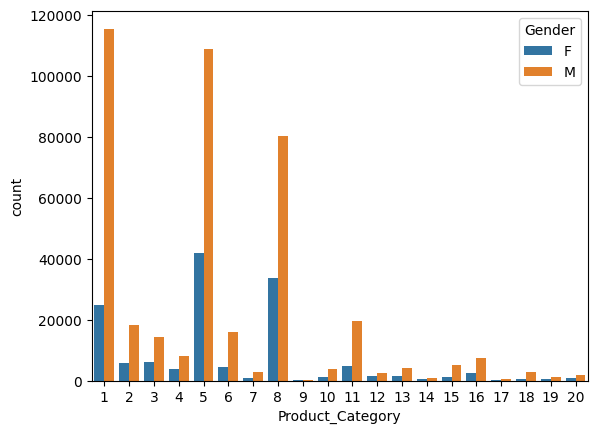

In [30]:
sns.countplot(data=df, x= df["Product_Category"], hue= df["Gender"])

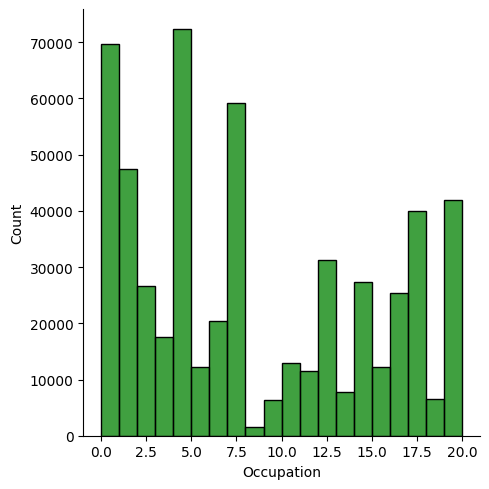

In [31]:
sns.displot(df["Occupation"],kde= False, color = "green", bins=20)

<Axes: xlabel='Product_Category', ylabel='Purchase'>

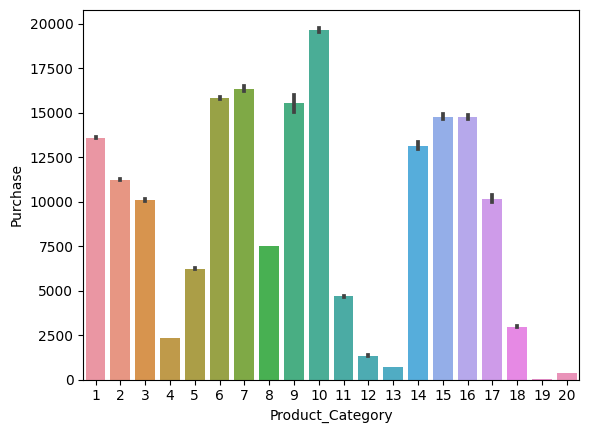

In [32]:
sns.barplot(data=df, x=df["Product_Category"], y=df["Purchase"])

In [33]:
df.corr()

<ipython-input-33-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,User_ID,Occupation,Marital_Status,Product_Category,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,-0.000463
Product_Category,0.003825,-0.007618,0.019888,1.000000,-0.343703
Purchase,0.004716,0.020833,-0.000463,-0.343703,1.000000


<ipython-input-34-2ad268e580f0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot= True, cmap = "YlGnBu")


<Axes: >

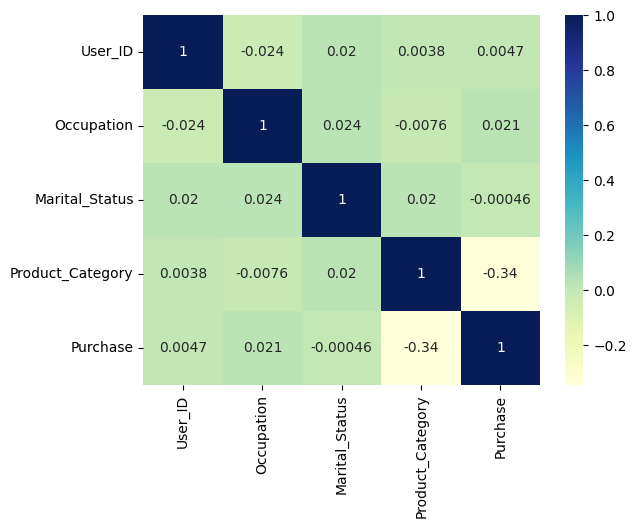

In [34]:
sns.heatmap(df.corr(), annot= True, cmap = "YlGnBu")

# **2. Missing value and Outlier detection.**

- Based on the given data outlier can be calculated only on purchase column, which is given below.

***Missing Value***

In [35]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

***Purchase Amount Outlier***

In [36]:
Q1 = np.percentile(df["Purchase"],25)
Q2 = np.percentile(df["Purchase"],50)
Q3 = np.percentile(df["Purchase"],75)
IQR = Q3-Q1
print("Q1 :", Q1)
print("Q2 :", Q2)
print("Q3 :", Q3)
print("Income IQR :", IQR)

Q1 : 5823.0
Q2 : 8047.0
Q3 : 12054.0
Income IQR : 6231.0


In [37]:
Upper_whisker = Q3+ (1.5*IQR)
Lower_whisker = (max(Q1- (1.5*IQR),0))
print("Upper whisker :", Upper_whisker)
print("Lower whisker :", Lower_whisker)

Upper whisker : 21400.5
Lower whisker : 0


In [38]:
pd.crosstab(index=df["Purchase"], columns=df["Gender"], margins= True, normalize=True)

Gender,F,M,All
Purchase,,,
12,0.000049,0.000135,0.000184
13,0.000045,0.000147,0.000193
14,0.000055,0.000118,0.000173
24,0.000051,0.000164,0.000215
25,0.000055,0.000151,0.000205
...,...,...,...
23958,0.000000,0.000007,0.000007
23959,0.000002,0.000002,0.000004
23960,0.000000,0.000007,0.000007


In [39]:
pd.crosstab(index=df["Purchase"], columns=df["Gender"], margins= True).describe()

Gender,F,M,All
count,18106.000000,18106.000000,18106.000000
mean,15.001546,45.759306,60.760853
std,1009.292174,3078.604946,4087.890789
min,0.000000,0.000000,1.000000
25%,1.000000,3.000000,4.000000
50%,3.000000,11.000000,15.000000
75%,9.000000,33.000000,42.000000
max,135809.000000,414259.000000,550068.000000


In [40]:
pd.crosstab(index=df["Product_Category"], columns=df["Age"], margins= True)

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+,All
Product_Category,,,,,,,,
1,3585,26962,58249,27648,10474,9049,4411,140378
2,805,4428,8928,4912,2105,1781,905,23864
3,1200,4710,7662,3854,1376,924,487,20213
4,758,2463,4192,2354,990,678,318,11753
5,4330,28522,61473,29377,11971,9893,5367,150933
6,399,3749,8485,3899,1622,1450,862,20466
7,53,481,1651,809,327,266,134,3721
8,2258,17911,44256,23296,10656,9340,6208,113925
9,16,63,154,107,33,29,8,410


In [41]:
pd.crosstab(index=df["Purchase"], columns=df["Marital_Status"], margins= True, normalize=True)

Marital_Status,0,1,All
Purchase,,,
12,0.000104,0.000080,0.000184
13,0.000115,0.000078,0.000193
14,0.000096,0.000076,0.000173
24,0.000142,0.000073,0.000215
25,0.000125,0.000080,0.000205
...,...,...,...
23958,0.000004,0.000004,0.000007
23959,0.000002,0.000002,0.000004
23960,0.000002,0.000005,0.000007


In [42]:
pd.crosstab(index=df["Purchase"], columns=df["Age"], margins= True, normalize=True)

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+,All
Purchase,,,,,,,,
12,0.000005,0.000036,0.000053,0.000042,0.000022,0.000013,0.000013,0.000184
13,0.000005,0.000031,0.000091,0.000029,0.000018,0.000009,0.000009,0.000193
14,0.000004,0.000035,0.000060,0.000035,0.000013,0.000024,0.000004,0.000173
24,0.000009,0.000038,0.000084,0.000040,0.000016,0.000015,0.000013,0.000215
25,0.000009,0.000029,0.000062,0.000045,0.000022,0.000022,0.000016,0.000205
...,...,...,...,...,...,...,...,...
23958,0.000000,0.000004,0.000000,0.000000,0.000000,0.000002,0.000002,0.000007
23959,0.000000,0.000000,0.000002,0.000000,0.000000,0.000002,0.000000,0.000004
23960,0.000000,0.000000,0.000000,0.000002,0.000002,0.000002,0.000002,0.000007


In [43]:
pd.crosstab(index=df["Age"], columns=df["Purchase"], margins= True)

Purchase,12,13,14,24,25,26,36,37,38,48,...,23952,23953,23954,23955,23956,23958,23959,23960,23961,All
Age,,,,,,,,,,,,,,,,,,,,,
0-17,3,3,2,5,5,5,2,5,5,2,...,0,1,0,1,0,0,0,0,0,15102
18-25,20,17,19,21,16,16,21,21,27,22,...,1,0,1,0,0,2,0,0,0,99660
26-35,29,50,33,46,34,42,34,41,36,35,...,0,1,0,1,1,0,1,0,3,219587
36-45,23,16,19,22,25,21,22,25,25,20,...,0,0,0,0,0,0,0,1,0,110013
46-50,12,10,7,9,12,12,12,6,7,15,...,0,0,0,0,0,0,0,1,0,45701
51-55,7,5,13,8,12,8,11,8,6,4,...,0,0,0,0,0,1,1,1,0,38501
55+,7,5,2,7,9,8,5,4,8,10,...,0,0,1,1,0,1,0,1,0,21504
All,101,106,95,118,113,112,107,110,114,108,...,1,2,2,3,1,4,2,4,3,550068


<Axes: xlabel='Occupation', ylabel='count'>

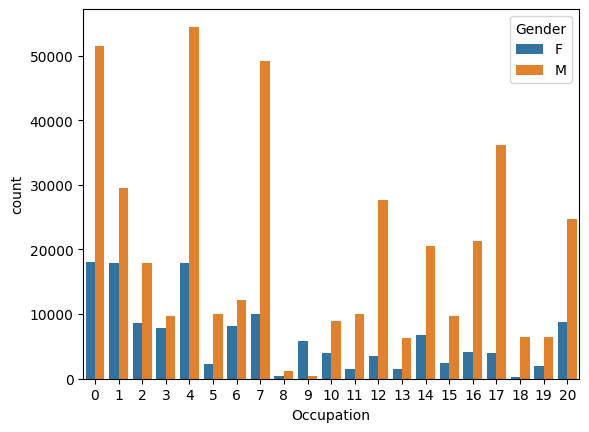

In [44]:
sns.countplot(data=df, x=df["Occupation"], hue = df["Gender"])

<Axes: xlabel='City_Category', ylabel='count'>

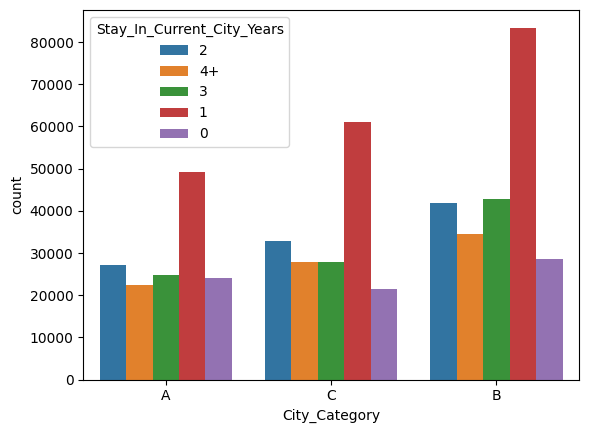

In [45]:
sns.countplot(data=df, x=df["City_Category"], hue = df["Stay_In_Current_City_Years"])

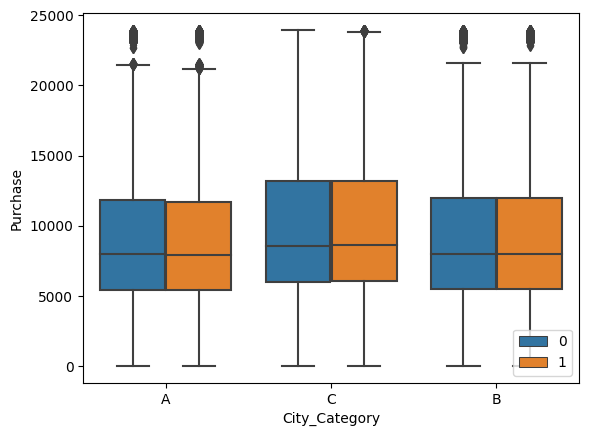

In [46]:
sns.boxplot(df,x=df["City_Category"],y=df["Purchase"], hue=df["Marital_Status"])
plt.legend(loc="lower right")

# **3. Business Insights based on Non- Graphical and Visual Analysis**

***i) Range of attributes***
* A total of 10 different attributes are given and each of it has it own range.
* This black friday sales data of Walmart has 550068 entries of **5891 unique user IDs**
* **Occupation** of these users are **categorised into 21 numbers**.
* There are **3631 unique product IDs** in the provided data.
* Male and Female are the Gender categories in the data.
* Age group of the customer is binned already in to 7 bins (0-17, 18-25, 26-35, 36-45, 46-50, 51-55, 55+).
* City of customer is categorized in to 3 - A, B, C.
* Number of years the customers have stayed in the current city is categorised into 5 categories - 0, 1, 2, 3, 4+.
* Marital Status of the customers are categorised into 2 values - 0,1. 0 is assumed to be "unmarried" and 1 as "married".
* Products of Walmart are categorised into 20 categories.
* Purchase values(ie) amount spent in each purchase is also mentioned.

***ii). Distribution of the variables and relationship between them***
- Of 5891 unique user IDs, user ID - **1001680 alone has 1026 entries**, which mean he is the most loyal customer to Walmart. User IDs - 1004277, 1001941, 1001181, 1000889 have 800+ entries.
- In the the occupation number category "4" dominates the count with 72000+ entries.
- Product ID- "P00265242" is the most frequently purchased item with 1880 mentions.
- Maximum records in gender belongs to Male category alone with a frequency of 414259.
- Among those the age group which who are their main customers belongs to the category 26-35. Almost 2 lakh entries belong to this age group.
- Walmart seems to come across more customers from "B" city-category, again with more than 2.3lakh entries.
- Customers who belongs to the category "1 year" are more in numbers considering the customers who've stayed in the current city for a certain time period.
- Marital status - "0" category which is assummed to be unmarried are the dominant customers with 3lakh+ entries.
- 5,1 and 8 are the most purchased product category in Walmart.
- Purchase amount of the customers normally ranges from 12 to 23,961 as per the given data.


# **4. Individual Questions asked**

In [47]:
female_purchase_mean= df[df["Gender"]=="F"]["Purchase"].mean()
print("female purchase mean :", female_purchase_mean)
female_married_purchase_mean= df[(df["Gender"]=="F")&(df["Marital_Status"]==1)]["Purchase"].mean()
print("female married purchase mean :",female_married_purchase_mean)
female_unmarried_purchase_mean= df[(df["Gender"]=="F")&(df["Marital_Status"]==0)]["Purchase"].mean()
print("female unmarried purchase mean :",female_unmarried_purchase_mean)

female purchase mean : 8734.565765155476
female married purchase mean : 8810.249789429354
female unmarried purchase mean : 8679.845815201532


In [48]:
male_purchase_mean= df[df["Gender"]=="M"]["Purchase"].mean()
print("male purchase mean :",male_purchase_mean)
male_married_purchase_mean= df[(df["Gender"]=="M")&(df["Marital_Status"]==1)]["Purchase"].mean()
print("male married purchase mean :",male_married_purchase_mean)
male_unmarried_purchase_mean= df[(df["Gender"]=="M")&(df["Marital_Status"]==0)]["Purchase"].mean()
print("male unmarried purchase mean :",male_unmarried_purchase_mean)

male purchase mean : 9437.526040472265
male married purchase mean : 9413.81760509418
male unmarried purchase mean : 9453.75674027083


 ## ***1. Are women spending more money per transaction than men?***
 * From the above results, it can be clearly seen that the males usually spend more money per transaction,than female in all the cases, whether they are single/married or just male in general. But a significant drop is observed between the values of married male's purchase mean than unmarried ones, **the reason can be because as a single men spend lavishly while married spends responsibly(because they also have to look over the family)**
 * Whereas among females, it is seen that married females spends more than the single female, its the exact opposite scenario, **the reason can be because single female might want to save and spend responsibly**. And married females who are head of the family, might have more works to fulfill hence ends up spending more for the family too.

## ***2. Confidence Intervals and distribution of the mean of expenses by female and male customers.***

**Calculating mean and sampling of gender purchase.**

Text(0.5, 1.0, 'Distribution of male purchase sample mean')

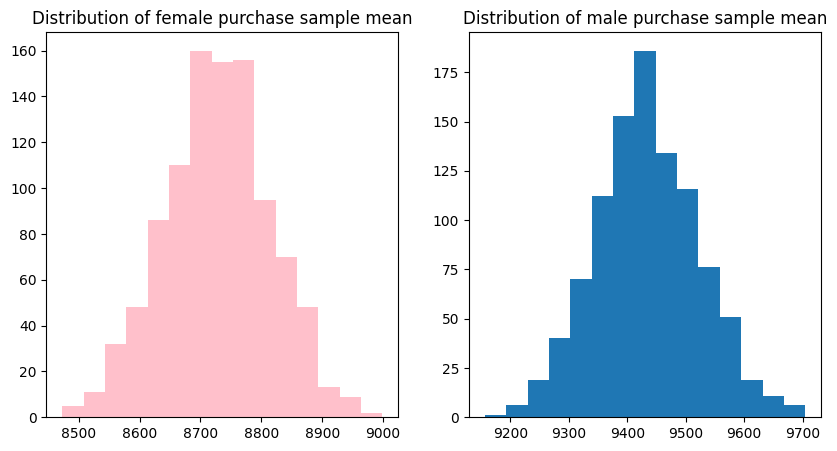

In [49]:
female_purchase_sample = [np.mean(df[df["Gender"]=="F"]["Purchase"].sample(3000)) for i in range(1000)]
male_purchase_sample = [np.mean(df[df["Gender"]=="M"]["Purchase"].sample(3000))for i in range(1000)]

fig,ax= plt.subplots(nrows=1, ncols=2, figsize = (10,5))
ax[0].hist(female_purchase_sample, bins=15, color="pink")
ax[1].hist(male_purchase_sample, bins=15)
ax[0].set_title("Distribution of female purchase sample mean")
ax[1].set_title("Distribution of male purchase sample mean")

In [50]:
female_purchase_mean= df[df["Gender"]=="F"]["Purchase"].mean()
print("female purchase mean :", female_purchase_mean)
female_purchase_SD = df[df["Gender"]=="F"]["Purchase"].std()
print("female purchase SD :", female_purchase_SD)
std_error_fem = female_purchase_SD/np.sqrt(len(female_purchase_sample))
print("female_purchase_SE :", std_error_fem)

female purchase mean : 8734.565765155476
female purchase SD : 4767.233289291458
female_purchase_SE : 150.753153315374


In [51]:
male_purchase_mean= df[df["Gender"]=="M"]["Purchase"].mean()
print("male purchase mean :", male_purchase_mean)
male_purchase_SD = df[df["Gender"]=="M"]["Purchase"].std()
print("male purchase SD :", male_purchase_SD)
std_error_male = male_purchase_SD/np.sqrt(len(male_purchase_sample))
print("male_purchase_SE :", std_error_male)

male purchase mean : 9437.526040472265
male purchase SD : 5092.18620977797
male_purchase_SE : 161.0290669259837


**At 95% Confidence Interval using CLT**

In [52]:
#Gender purchase @ 95% confidence interval

fem_lower_limit = female_purchase_mean+(-1.96*150.75)
fem_upper_limit = female_purchase_mean+(1.96*150.75)
male_lower_limit = male_purchase_mean+(-1.96*161.03)
male_upper_limit = male_purchase_mean+(1.96*161.03)
print("Female purchase mean :", female_purchase_mean,",","Male purchase mean :", male_purchase_mean)
print("Female purchase lower and upper limit @ 95% CI :", fem_lower_limit,",",fem_upper_limit)
print("Male purchase lower and upper limit @ 95% CI :", male_lower_limit,",",male_upper_limit)

Female purchase mean : 8734.565765155476 , Male purchase mean : 9437.526040472265
Female purchase lower and upper limit @ 95% CI : 8439.095765155476 , 9030.035765155475
Male purchase lower and upper limit @ 95% CI : 9121.907240472265 , 9753.144840472265


**At 90% Confidence Interval using CLT**

In [53]:
#Gender purchase @ 90% confidence interval

fem_lower_limit = female_purchase_mean+(-1.64*150.75)
fem_upper_limit = female_purchase_mean+(1.64*150.75)
male_lower_limit = male_purchase_mean+(-1.64*161.03)
male_upper_limit = male_purchase_mean+(1.64*161.03)
print("Female purchase mean :", female_purchase_mean,",","Male purchase mean :", male_purchase_mean)
print("Female purchase lower and upper limit @ 90% CI :", fem_lower_limit,",",fem_upper_limit)
print("Male purchase lower and upper limit @ 90% CI :", male_lower_limit,",",male_upper_limit)

Female purchase mean : 8734.565765155476 , Male purchase mean : 9437.526040472265
Female purchase lower and upper limit @ 90% CI : 8487.335765155476 , 8981.795765155475
Male purchase lower and upper limit @ 90% CI : 9173.436840472265 , 9701.615240472265


## ***3. Are confidence intervals between male and female overlapping? If so how to leverage this conclusion***

* There is a significant difference between the CI of the genders at both the **confidence interval(@ 90% and 95%)** calculated. No overlapping observed in the sampled data. But most of the difference is due to the gap between the mean of male and female purchase, where **male purchase mean is 9437.5** and **female purchase mean is only around 8734.5**.


## ***4. Sampling mean, SD and CI using CLT for purchase pattern observed between married and unmarried.***

**Calculating purchase mean and sampling based on Marital Status**

In [54]:
Unmarried_purchase_mean = df[df["Marital_Status"]==0]["Purchase"].mean()
Married_purchase_mean = df[df["Marital_Status"]==1]["Purchase"].mean()
print("Unmarried purchase mean :", Unmarried_purchase_mean,",","Married purchase mean:", Married_purchase_mean)

Unmarried purchase mean : 9265.907618921507 , Married purchase mean: 9261.174574082374


Text(0.5, 1.0, 'Married_purchase_sample_mean_dist')

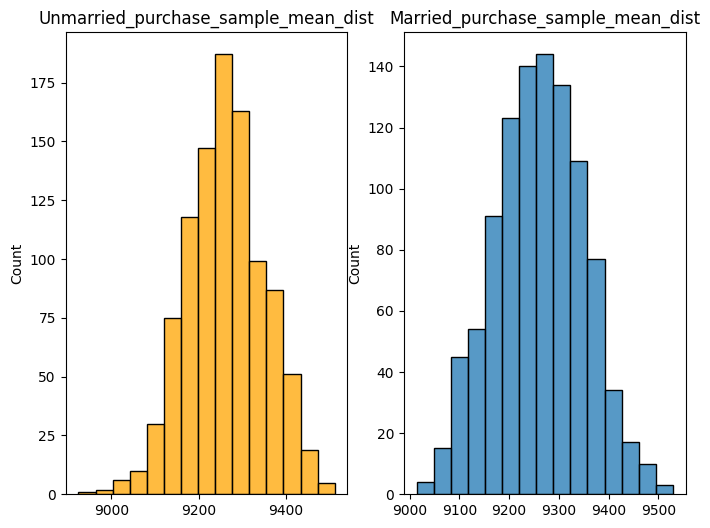

In [55]:
unmarried_purchase_sample = [np.mean(df[df["Marital_Status"]==0]["Purchase"].sample(3000)) for i in range(1000)]
married_purchase_sample = [np.mean(df[df["Marital_Status"]==1]["Purchase"].sample(3000)) for i in range(1000)]

fig,ax= plt.subplots(nrows=1, ncols=2, figsize = (8,6))
plt.subplot(1,2,1)
sns.histplot(unmarried_purchase_sample, bins=15, color="orange")
plt.subplot(1,2,2)
sns.histplot(married_purchase_sample, bins=15)
ax[0].set_title("Unmarried_purchase_sample_mean_dist")
ax[1].set_title("Married_purchase_sample_mean_dist")

In [56]:
Unmarried_purchase_mean = df[df["Marital_Status"]==0]["Purchase"].mean()
print("Unmarried purchase mean :", Unmarried_purchase_mean)
Unmarried_purchase_SD = df[df["Marital_Status"]==0]["Purchase"].std()
print("Unmarried purchase SD :", Unmarried_purchase_SD)
std_error_unmarried = Unmarried_purchase_SD/np.sqrt(len(unmarried_purchase_sample))
print("Unmarried purchase SE :", std_error_unmarried)

Unmarried purchase mean : 9265.907618921507
Unmarried purchase SD : 5027.347858674449
Unmarried purchase SE : 158.9786982338155


In [57]:
Married_purchase_mean = df[df["Marital_Status"]==1]["Purchase"].mean()
print("Married purchase mean :", Married_purchase_mean)
Married_purchase_SD = df[df["Marital_Status"]==1]["Purchase"].std()
print("Married purchase SD :", Married_purchase_SD)
std_error_married = Married_purchase_SD/np.sqrt(len(married_purchase_sample))
print("Married purchase SE :", std_error_married)

Married purchase mean : 9261.174574082374
Married purchase SD : 5016.897377793055
Married purchase SE : 158.648225011523


**At 95% confidence interval using CLT (Married vs Unmarried purchase)**

In [58]:
#Purchase based on marital status @ 95% confidence interval

unmarried_lower_limit = Unmarried_purchase_mean+(-1.96*158.97)
unmarried_upper_limit = Unmarried_purchase_mean+(1.96*158.97)
married_lower_limit = Married_purchase_mean+(-1.96*158.64)
married_upper_limit = Married_purchase_mean+(1.96*158.64)
print("Unmarried purchase mean :", Unmarried_purchase_mean,",","Married purchase mean :", Married_purchase_mean)
print("Unmarried purchase lower and upper limit @ 95% CI :", unmarried_lower_limit,",",unmarried_upper_limit)
print("Married purchase lower and upper limit @ 95% CI :", married_lower_limit,",",married_upper_limit)

Unmarried purchase mean : 9265.907618921507 , Married purchase mean : 9261.174574082374
Unmarried purchase lower and upper limit @ 95% CI : 8954.326418921506 , 9577.488818921507
Married purchase lower and upper limit @ 95% CI : 8950.240174082373 , 9572.108974082374


## ***5. Sampling mean, SD and CI using CLT for purchase pattern observed between different age groups***

**Calculating purchase mean and sampling based on Age group**

In [59]:
kids_purchase_mean = df.loc[df["Age"]=="0-17"]["Purchase"].mean()
youth_purchase_mean = df.loc[df["Age"]=="18-25"]["Purchase"].mean()
young_adult_purchase_mean = df.loc[df["Age"]=="26-35"]["Purchase"].mean()
middle_adult_purchase_mean = df.loc[df["Age"]=="36-45"]["Purchase"].mean()
adult_purchase_mean = df.loc[df["Age"]=="46-50"]["Purchase"].mean()
elder_purchase_mean = df.loc[df["Age"]=="51-55"]["Purchase"].mean()
old_purchase_mean = df.loc[df["Age"]=="55+"]["Purchase"].mean()

print("kids_purchase_mean(0-17) :", kids_purchase_mean)
print("youth_purchase_mean(18-25) :", youth_purchase_mean)
print("young_adult_purchase_mean(26-35) :", young_adult_purchase_mean)
print("middle_adult_purchase_mean(36-45) :", middle_adult_purchase_mean)
print("adult_purchase_mean(46-50) :", adult_purchase_mean)
print("elder_purchase_mean(51-55) :", elder_purchase_mean)
print("old_purchase_mean(55+) :", old_purchase_mean)

kids_purchase_mean(0-17) : 8933.464640444974
youth_purchase_mean(18-25) : 9169.663606261289
young_adult_purchase_mean(26-35) : 9252.690632869888
middle_adult_purchase_mean(36-45) : 9331.350694917874
adult_purchase_mean(46-50) : 9208.625697468327
elder_purchase_mean(51-55) : 9534.808030960236
old_purchase_mean(55+) : 9336.280459449405


<ipython-input-60-db983ee0ac31>:22: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,4,4)


<Axes: ylabel='Count'>

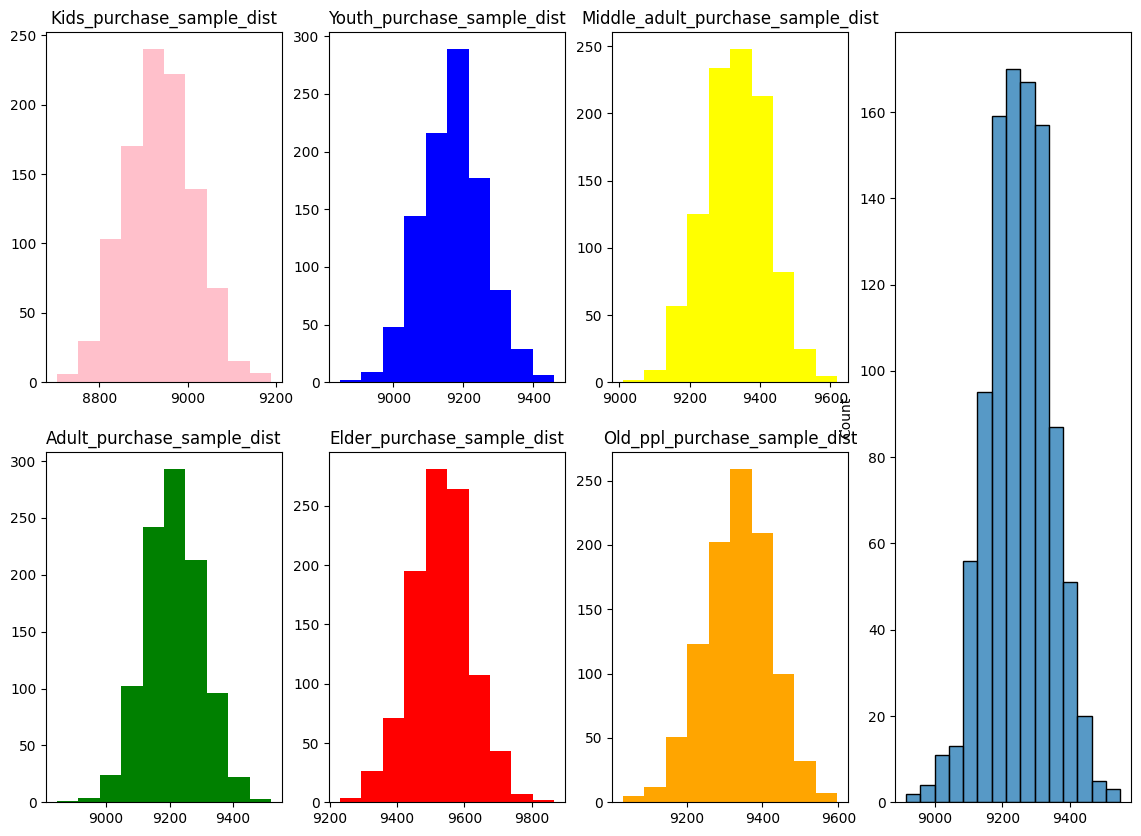

In [60]:
kids_purchase_sample= [np.mean(df[df["Age"]=="0-17"]["Purchase"].sample(3000)) for i in range(1000)]
youth_purchase_sample= [np.mean(df[df["Age"]=="18-25"]["Purchase"].sample(3000)) for i in range(1000)]
young_adult_purchase_sample = [np.mean(df[df["Age"]=="26-35"]["Purchase"].sample(3000)) for i in range(1000)]
middle_adult_purchase_sample = [np.mean(df[df["Age"]=="36-45"]["Purchase"].sample(3000)) for i in range(1000)]
adult_purchase_sample= [np.mean(df[df["Age"]=="46-50"]["Purchase"].sample(3000)) for i in range(1000)]
elder_purchase_sample = [np.mean(df[df["Age"]=="51-55"]["Purchase"].sample(3000)) for i in range(1000)]
old_purchase_sample= [np.mean(df[df["Age"]=="55+"]["Purchase"].sample(3000)) for i in range(1000)]

fig,ax= plt.subplots(nrows=2, ncols=4, figsize = (14,10))
ax[0,0].hist(kids_purchase_sample, bins=10, color = "pink")
ax[0,0].set_title("Kids_purchase_sample_dist")
ax[0,1].hist(youth_purchase_sample,bins=10, color= "blue")
ax[0,1].set_title("Youth_purchase_sample_dist")
ax[0,2].hist(middle_adult_purchase_sample,bins=10, color= "yellow")
ax[0,2].set_title("Middle_adult_purchase_sample_dist")
ax[1,0].hist(adult_purchase_sample,bins=10, color= "green")
ax[1,0].set_title("Adult_purchase_sample_dist")
ax[1,1].hist(elder_purchase_sample,bins=10, color= "red")
ax[1,1].set_title("Elder_purchase_sample_dist")
ax[1,2].hist(old_purchase_sample,bins=10, color= "orange")
ax[1,2].set_title("Old_ppl_purchase_sample_dist")
plt.subplot(1,4,4)
sns.histplot(young_adult_purchase_sample, bins= 15)

In [61]:
kids_purchase_mean = df.loc[df["Age"]=="0-17"]["Purchase"].mean()
print("Kids_purchase_mean(0-17):", kids_purchase_mean)
kids_purchase_SD = df.loc[df["Age"]=="0-17"]["Purchase"].std()
print("Kids_purchase_SD(0-17):", kids_purchase_SD)
std_error_kids_purchase = kids_purchase_SD/np.sqrt(len(kids_purchase_sample))
print("std_error_kids_purchase :", std_error_kids_purchase)

Kids_purchase_mean(0-17): 8933.464640444974
Kids_purchase_SD(0-17): 5111.11404600277
std_error_kids_purchase : 161.6276176624738


In [62]:
youth_purchase_mean = df.loc[df["Age"]=="18-25"]["Purchase"].mean()
print("Youth_purchase_mean(18-25):", youth_purchase_mean)
youth_purchase_SD = df.loc[df["Age"]=="18-25"]["Purchase"].std()
print("Youth_purchase_SD(18-25):", youth_purchase_SD)
std_error_youth_purchase = youth_purchase_SD/np.sqrt(len(youth_purchase_sample))
print("std_error_youth_purchase :", std_error_youth_purchase)

Youth_purchase_mean(18-25): 9169.663606261289
Youth_purchase_SD(18-25): 5034.32199717658
std_error_youth_purchase : 159.1992398576576


In [63]:
young_adult_purchase_mean = df.loc[df["Age"]=="26-35"]["Purchase"].mean()
print("Young_adult_purchase_mean(26-35):", young_adult_purchase_mean)
young_adult_purchase_SD = df.loc[df["Age"]=="26-35"]["Purchase"].std()
print("Young_adult_purchase_SD(26-35):", young_adult_purchase_SD)
std_error_young_adult_purchase = young_adult_purchase_SD/np.sqrt(len(young_adult_purchase_sample))
print("std_error_young_adult_purchase :", std_error_young_adult_purchase)

Young_adult_purchase_mean(26-35): 9252.690632869888
Young_adult_purchase_SD(26-35): 5010.527303002956
std_error_young_adult_purchase : 158.4467855594997


In [64]:
middle_adult_purchase_mean = df.loc[df["Age"]=="36-45"]["Purchase"].mean()
print("Middle_adult_purchase_mean(36-45):", middle_adult_purchase_mean)
middle_adult_purchase_SD = df.loc[df["Age"]=="36-45"]["Purchase"].std()
print("Middle_adult_purchase_SD(36-45):", middle_adult_purchase_SD)
std_error_middle_adult_purchase = middle_adult_purchase_SD/np.sqrt(len(middle_adult_purchase_sample))
print("std_error_middle_adult_purchase :", std_error_middle_adult_purchase)

Middle_adult_purchase_mean(36-45): 9331.350694917874
Middle_adult_purchase_SD(36-45): 5022.923879204662
std_error_middle_adult_purchase : 158.83879971935198


In [65]:
adult_purchase_mean = df.loc[df["Age"]=="46-50"]["Purchase"].mean()
print("Adult_purchase_mean(46-50):", adult_purchase_mean)
adult_purchase_SD = df.loc[df["Age"]=="46-50"]["Purchase"].std()
print("Adult_purchase_SD(46-50):", adult_purchase_SD)
std_error_adult_purchase = adult_purchase_SD/np.sqrt(len(adult_purchase_sample))
print("std_error_adult_purchase :", std_error_adult_purchase)

Adult_purchase_mean(46-50): 9208.625697468327
Adult_purchase_SD(46-50): 4967.216367142941
std_error_adult_purchase : 157.07717351038858


In [66]:
elder_purchase_mean = df.loc[df["Age"]=="51-55"]["Purchase"].mean()
print("Elder_purchase_mean(51-55):", elder_purchase_mean)
elder_purchase_SD = df.loc[df["Age"]=="51-55"]["Purchase"].std()
print("Elder_purchase_SD(51-55):", elder_purchase_SD)
std_error_elder_purchase = elder_purchase_SD/np.sqrt(len(elder_purchase_sample))
print("std_error_elder_purchase :", std_error_elder_purchase)

Elder_purchase_mean(51-55): 9534.808030960236
Elder_purchase_SD(51-55): 5087.368079602135
std_error_elder_purchase : 160.87670427179543


In [67]:
old_purchase_mean = df.loc[df["Age"]=="55+"]["Purchase"].mean()
print("Old_purchase_mean(55+):", old_purchase_mean)
old_purchase_SD = df.loc[df["Age"]=="55+"]["Purchase"].std()
print("Old_purchase_SD(55+):", old_purchase_SD)
std_error_old_purchase = old_purchase_SD/np.sqrt(len(old_purchase_sample))
print("std_error_old_purchase :", std_error_old_purchase)

Old_purchase_mean(55+): 9336.280459449405
Old_purchase_SD(55+): 5011.4939956034605
std_error_old_purchase : 158.47735506364793


**At 95% confidence interval using CLT (between different age groups)**

In [68]:
#Purchase based on age group @ 95% confidence interval

kids_lower_limit = kids_purchase_mean+(-1.96*161.62)
kids_upper_limit = kids_purchase_mean+(1.96*161.62)
youth_lower_limit = youth_purchase_mean+(-1.96*159.2)
youth_upper_limit = youth_purchase_mean+(1.96*159.2)
young_adult_lower_limit = young_adult_purchase_mean+(-1.96*158.45)
young_adult_upper_limit = young_adult_purchase_mean+(1.96*158.45)
middle_adult_lower_limit = middle_adult_purchase_mean+(-1.96*158.84)
middle_adult_upper_limit = middle_adult_purchase_mean+(1.96*158.84)
adult_lower_limit = adult_purchase_mean+(-1.96*157.08)
adult_upper_limit = adult_purchase_mean+(1.96*157.08)
elder_lower_limit = elder_purchase_mean+(-1.96*160.87)
elder_upper_limit = elder_purchase_mean+(1.96*160.87)
old_lower_limit = old_purchase_mean+(-1.96*158.48)
old_upper_limit = old_purchase_mean+(1.96*158.48)
print("kids purchase(0-17) lower and upper limit @ 95% CI :", kids_lower_limit,",",kids_upper_limit)
print("youth purchase(18-25) lower and upper limit @ 95% CI :", youth_lower_limit,",",youth_upper_limit)
print("young_adult purchase(26-35) lower and upper limit @ 95% CI :", young_adult_lower_limit,",",young_adult_upper_limit)
print("middle_adult purchase(36-45) lower and upper limit @ 95% CI :", middle_adult_lower_limit,",",middle_adult_upper_limit)
print("adult purchase(46-50) lower and upper limit @ 95% CI :", adult_lower_limit,",",adult_upper_limit)
print("elder purchase(51-55) lower and upper limit @ 95% CI :", elder_lower_limit,",",elder_upper_limit)
print("old purchase(55+) lower and upper limit @ 95% CI :", old_lower_limit,",",old_upper_limit)

kids purchase(0-17) lower and upper limit @ 95% CI : 8616.689440444974 , 9250.239840444974
youth purchase(18-25) lower and upper limit @ 95% CI : 8857.63160626129 , 9481.695606261288
young_adult purchase(26-35) lower and upper limit @ 95% CI : 8942.128632869888 , 9563.252632869888
middle_adult purchase(36-45) lower and upper limit @ 95% CI : 9020.024294917874 , 9642.677094917874
adult purchase(46-50) lower and upper limit @ 95% CI : 8900.748897468327 , 9516.502497468327
elder purchase(51-55) lower and upper limit @ 95% CI : 9219.502830960235 , 9850.113230960236
old purchase(55+) lower and upper limit @ 95% CI : 9025.659659449404 , 9646.901259449405


# **5. Final insights**

## ***i) Comments for each univariate and bivariate plots***

### Univariate Analysis
- An ***univariate pie chart*** was created using the city category from the given data and the results shows that among the 3 city categories(A,B,C) given, **B category is the top one with 42% sales** compared to C category with 31% and A with 27% respectively.
- a **distplot** was created using the Occupation category of the data, where about 20 different occupation are given and the result shows that Occupation category **4 is the most followed work which has count of more than 72,000 customers**. Followed by occupation category 0 with nearly 70,000 count and category 7 with 60,000 count.

### Bivarieate and Multivariate Analysis'
- A boxplot was created using Age and Purchase columns to see what is the range of purchase value for each age groups and how it differs between male and female of each group. Among the list **age group 51-55 male is having the higher upper limit**, whereas for **female 46-50 range has higher upper limit **than others. Eventhough sales for 51-55 age group is high, itseems that age group 55+ has the least value amongst all. So they're definitely the target customers for pricey items.
- Another comparison of sales count between each age group was conducted using hist plot, and among that male and female variation was also shown, and from that it's strikingly obvious that **26-35 age group are the main customers for Walmart, because of their 1,60,000 saless count**, which is double than** 80,000 sales count shown by 36-45 age group** and this is the secind highest contributor to Walmart. Followed very closely by **18-25 age group with more than 75,000 sales count**. Even when split into genders the sales order follows the same pattern among age groups as said above ("26-35" > "36-45" > "18-25").
- A barplot was created to observe the sales count among different product categories between both the genders. And it's clearly visible that **product category 5 has the highest sales count with 1,50,000**, followed by category 1 with 1,40,000 sales count and category 8 with 1,10,000 count. Among Genders Male category alone contributed to 1,15,000 sales in pdt. category 1 which is the highest for that gender, followed by 5 and 8 respectfully. Among females, highest sales was observed in category 5 with 40,000 and 8 with 35,000.
- But when the same product category got compared with purchase value in a bar plot, **category 10 shows highest value of 20,000**. Followed by category 7,6 and 9. *But when looked at the sales count of all the four categories, the count is too low, reason for the high numbers can be because those categories are expensive ones*.
- A countplot was created using the Occupation catergories between both the genders given. It was already observed that 4 was the most followed occupation category followed by occupation 0 and 7. But when looked at the gender and occupation, **female follows 0,1 and 4 occupation categories equally**, whereas males following order is same as the total count.
- It was already observed in pie-chart that B is the city category with most number of sales, when a countplot was created between the three city categories and their stay in current city for certain number of years, there is a **clear spike in sales in walmart from the people who've stayed in the current city for 1 year in all 3 city categories** followed by those who've stayed for 2 years.
- Another boxplot was created between city category and the purchase value between two genders in both the cities. and **when looked at the amount spent in average between the 3 city categories, C category seems to have higher average than the other two**. Gender average seems to maintain the same condition among the same city categories.
- In the heatmap created between correlated variables, Purchase and User_ID are the columns which shows highest +ve correlation than the rest compared.
## ***ii) Comments on different variables when generalizing it for Population***
Many crosstab calculations were done between few variables available and it's results are listed below,
- When Product category sales were observed between the two genders, **female alone had 135809 sales out of 550068, which is 24.7% of total sales **and **male category had	414259 sales out of 550068 which is 75.3% of the total sales**.
- As far as the sales in different city categories between two genders are concerned, sales percent is pretty much the same as product sales between two genders in A and C, there is a slight variation in B alone with 25% sales female category and 75% in male.
- When sales was observed between marital status of the customer, it shows that **unmarried people spends more than married ones, which is almost 60% of the total purchase and only 40% of sales value listed in walmart comes from the married ones.**
- When purchase value is observed between different age groups, it was clearly shown in a bar plot that **26-35("young-adult") category spends the most, which is about 40% of total sales**, followed by **36-45("middle-adult") with 20% and 18-25("Youth") with 18%**

# **6. Recommendations**
- When looked at the sales pattern between the 3 city categories, steps should be taken to follow the method followed in Category B, **as it has a significant growth among customers who prefers to go for Walmart even after 3 years of stay, that ways, it will add more loyal customers to Walmart.**
- Sales number was way to high for 26-35 year old age group, followed by 36-45  and 18-25, who might be in their active working period and hence the higher purchase, **care should be taken to add products which are more preferable for other age groups, in order to boost the sales among them**.
- As per the observed data, unmarried people spends way more at Walmart than Married ones, hence again products suitable for a family or a couple should be added to increase the married customers.
- To customers(USER_ID) who've been frequent/**loyal visitors of Walmart** some sort of** additional discount or token of appreciation or loyality program can be given in order to maintain a good customer-seller loyalty.** For example, there are people with more than 1000 number of visits, such people should be given extra care(for eg. special birthday week discount can be given)
- **Product categories which sees high number of sales** should be taken into consideration and** more varieties in the items of that category should be stocked.** As far as other categories which has high value but sees less sales comparatively, seasonal discounts can be given for such in order to avoid over stocking of that product, where as for product category which don't value much but still doesn't see big sales, eye catching upgradation of such products can be done, it will be experimental, but if that clicks, that will also boost the sales.
- Major factor that should be looked into is, the sales difference between both the genders, which are very HUGE. **Products(feminine products) which will attract female customers should be added compulsorily and some discounts should be given in order to lure the female customers **initially, till there is a significant rise in female sales.